### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

## 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\S Keerthana\Desktop\Career Foundry\Achivement 6\02 Data'

In [4]:
#Importing llisting data
df=pd.read_csv(os.path.join(path,'Prepared Data','newyork_final.csv'),index_col=False)

In [5]:
df.shape

(48895, 14)

In [6]:
df.head()

,Listing_id,Host_id,neighbourhood_group,neighbourhood,latitude,longitude,Room_type,Price_list,Rating,Availability_365,location,D.Train,D.airport,D.Statue_of_liberty
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,0.21,365,"(40.64749, -73.97237)",11.699223,16.388641,7.652417
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,0.38,355,"(40.75362, -73.98377)",0.560817,21.443784,8.803805
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,0.00,365,"(40.80902, -73.9419)",6.920867,23.304873,15.879021
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,4.64,194,"(40.68514, -73.95976)",7.654630,16.105092,7.172440
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,0.10,0,"(40.79851, -73.94399)",5.801883,22.483763,14.812923


## 2. The elbow technique

In [7]:
#create subset

df_clust=df[['Price_list','Availability_365','Rating','D.Train','D.Statue_of_liberty','D.airport']]

In [8]:
df_clust.shape

(48895, 6)

In [9]:
df_clust.shape

(48895, 6)

In [10]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_clust)

In [11]:
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [12]:
pca.explained_variance_ratio_

array([0.29532935, 0.1905737 , 0.17413225, 0.1534814 , 0.13040391,
       0.0560794 ])

Text(0, 0.5, 'Cummulative explained variance')

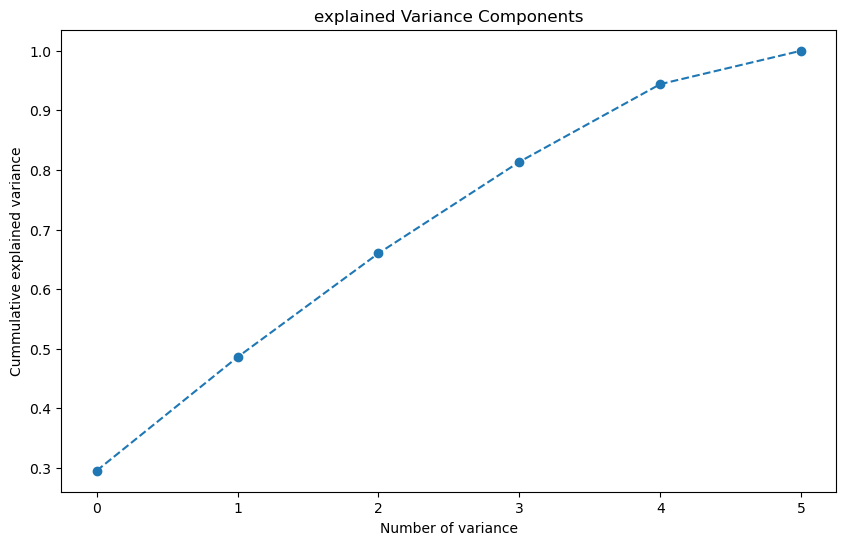

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(0,6),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('explained Variance Components')
plt.xlabel('Number of variance')
plt.ylabel('Cummulative explained variance')

In [14]:
# From previous graph, we can see we can use 3 or 4 components. We use 3 components as it covers 90%
pca=PCA(n_components=4)

In [15]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [16]:
pca.transform(segmentation_std)

array([[-0.83273237,  0.78422383,  0.80672769,  0.89750035],
       [ 1.21544841,  1.53537905, -0.04142134, -0.0087547 ],
       [-0.41023735,  1.38688687, -1.43577596,  0.43605537],
       ...,
       [ 0.02804408, -0.43949888, -1.94943398,  0.12574435],
       [ 1.55262777, -0.76960543, -0.61731715, -0.51123543],
       [ 1.45981887, -0.56544426, -0.73964029, -0.38529259]])

In [17]:
scores_pca=pca.transform(segmentation_std)

In [18]:
#fitting PCA to k-means

wcss=[]
for i in range(1,10):
    kmeans_pca=KMeans(n_clusters = i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

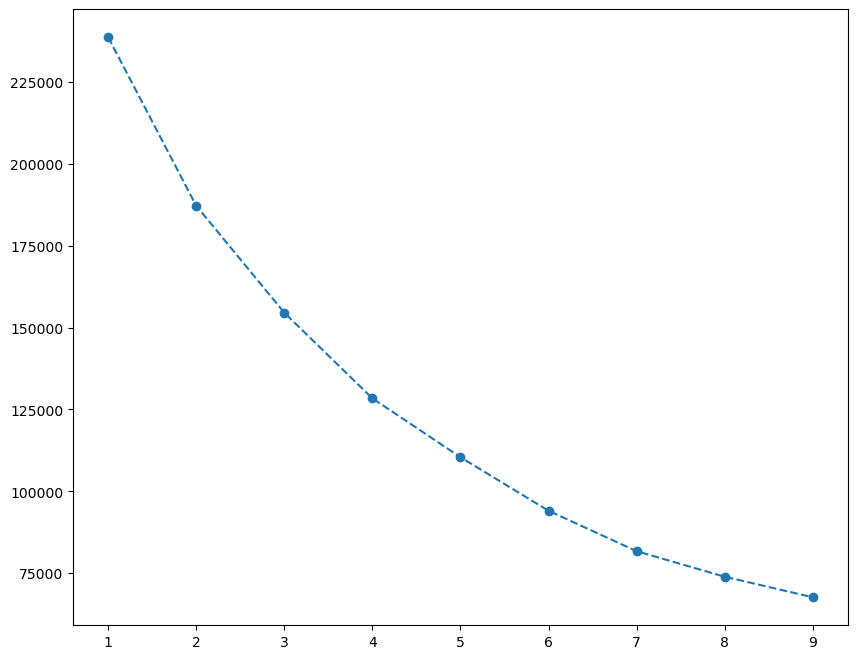

In [19]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),wcss,marker='o',linestyle = '--')
plt.xlabel=('Number of Clusters')
plt.ylabel=('WCSS')
plt.titke=('K-means with PCA clustering')
plt.show()

In [20]:
# from the gRaph above, we can understand the elbow bents between 4-5 . For this scenario, we will go with 4.

kmeans_pca=KMeans(n_clusters=4 , init ='k-means++', random_state=42)

In [21]:
# fitting data with k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [22]:
scores_pca.shape

(48895, 4)

In [23]:
df_seg_pca_kmean=pd.concat([df_clust.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_seg_pca_kmean.columns.values[-3:]=['Component 1','Component 2','Component 3']
df_seg_pca_kmean['Segment K-means PCA']=kmeans_pca.labels_

In [24]:
df['Clusters']=kmeans_pca.labels_

In [25]:
df_seg_pca_kmean

,Price_list,Availability_365,Rating,D.Train,D.Statue_of_liberty,D.airport,0,Component 1,Component 2,Component 3,Segment K-means PCA
0,149.0,365,0.21,11.699223,7.652417,16.388641,-0.832732,0.784224,0.806728,0.897500,0
1,225.0,355,0.38,0.560817,8.803805,21.443784,1.215448,1.535379,-0.041421,-0.008755,1
2,150.0,365,0.00,6.920867,15.879021,23.304873,-0.410237,1.386887,-1.435776,0.436055,3
3,89.0,194,4.64,7.654630,7.172440,16.105092,-0.781366,1.048638,1.463812,-1.421736,1
4,80.0,0,0.10,5.801883,14.812923,22.483763,0.240861,-0.702981,-1.494117,-0.056034,3
...,...,...,...,...,...,...,...,...,...,...,...
48890,70.0,9,0.00,8.561084,8.074998,15.094407,-0.051772,-1.306621,0.612543,0.436801,2
48891,40.0,36,0.00,6.771045,9.509718,14.756378,-0.042651,-1.169801,0.518295,0.303510,2
48892,115.0,27,0.00,7.291773,16.121563,24.155980,0.028044,-0.439499,-1.949434,0.125744,3
48893,55.0,2,0.00,1.285899,8.825819,22.199816,1.552628,-0.769605,-0.617317,-0.511235,2


In [26]:
df_seg_pca_kmean['Segment K-means PCA'].value_counts()

2    22258
1    11268
0     8445
3     6924
Name: Segment K-means PCA, dtype: int64

In [27]:
# restarting matplotlib

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

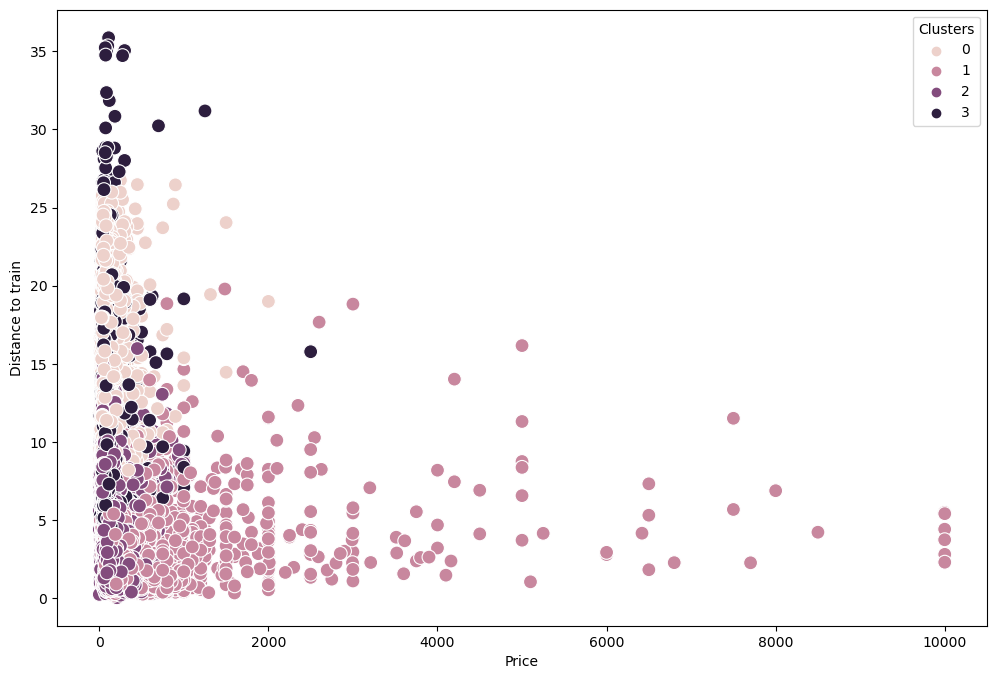

In [28]:
# Plot the clusters for the "Price" and "D.Train" variables.

plt.figure(figsize=(12,8))
pricebed = sns.scatterplot(x=df['Price_list'], y=df['D.Train'], hue=df['Clusters'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
pricebed.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Distance to train') # Label y-axis.
plt.show()

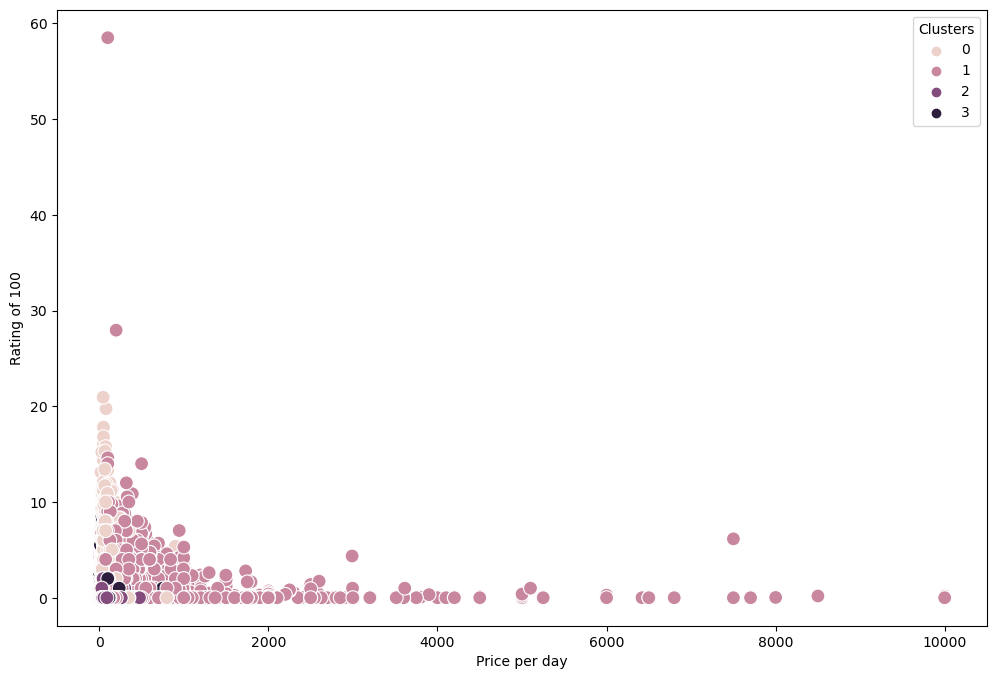

In [29]:
# Plot the clusters for the "Price" and "Rating" variables.

plt.figure(figsize=(12,8))
af = sns.scatterplot(x=df['Price_list'], y=df['Rating'], hue=df['Clusters'], s=100)

af.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Rating of 100') 
plt.show()

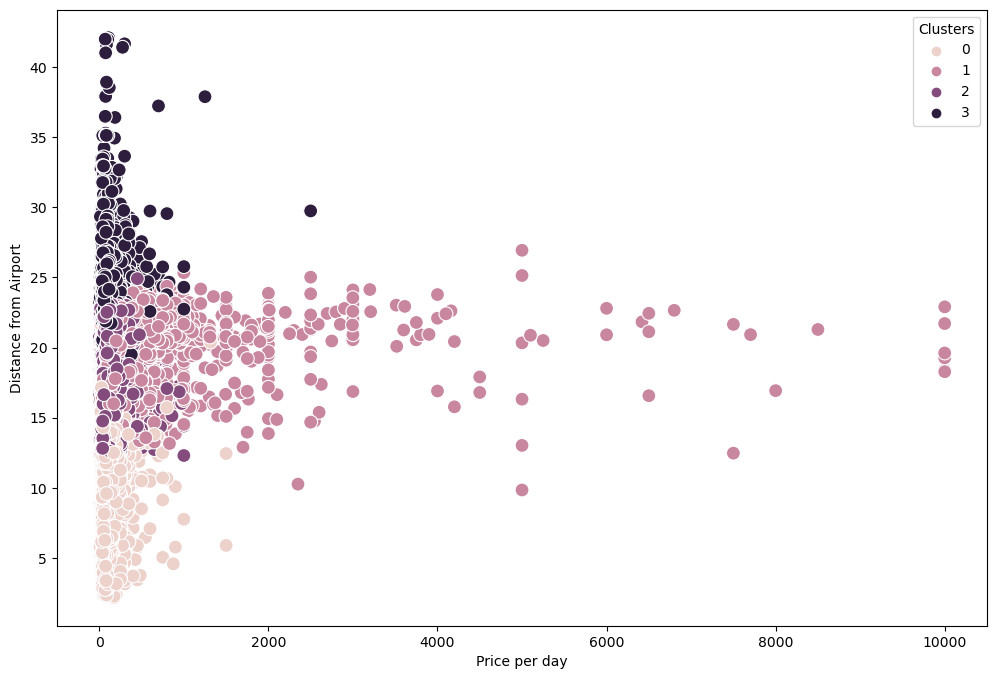

In [30]:
# Plot the clusters for the "price_list" and "Distance from airport" variables.

plt.figure(figsize=(12,8))
ag = sns.scatterplot(x=df['Price_list'], y=df['D.airport'], hue=df['Clusters'], s=100)

ag.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Distance from Airport') 
plt.show()

Text(0.5, 0, 'Rating')

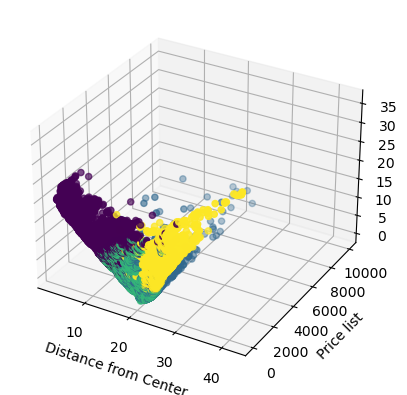

In [31]:
fig = plt.figure()
ah = fig.add_subplot(111, projection='3d')
x = np.array(df['D.airport'])
y = np.array(df['Price_list'])
z = np.array(df['D.Train'])
ah.scatter(x,y,z, c=[kmeans_pca.labels_], s=20)
ah.set_xlabel("Distance from Center")
ah.set_ylabel("Price list") 
ah.set_zlabel("Rating")

In [32]:
df.loc[df['Clusters'] == 2, 'Cluster'] = 'pink'
df.loc[df['Clusters'] == 1, 'Cluster'] = 'light pink'
df.loc[df['Clusters'] == 0, 'Cluster'] = 'beige'
df.loc[df['Clusters'] == 3, 'Cluster'] = 'purple'

In [33]:
df.groupby('Clusters').agg({'Price_list':['mean', 'median'], 
                         'D.airport':['mean', 'median'],
                           'Rating':['mean','median'],
                           'D.Train':['mean','median']})

Price_list         D.airport               Rating           D.Train  \
                mean median       mean     median      mean median       mean   
Clusters                                                                        
0          93.937596   73.0  12.797792  13.490051  2.003456   1.48  11.799103   
1         261.863774  175.0  20.073327  20.546782  1.787377   1.13   3.849387   
2         135.062899  110.0  18.146643  17.902588  0.405602   0.14   5.477443   
3         103.562103   80.0  24.686365  24.271203  1.047486   0.44   9.153363   

                     
             median  
Clusters             
0         10.642477  
1          3.475128  
2          4.939820  
3          7.957374

In [34]:
# Exporting this for final presentation
df.to_csv(os.path.join(path,'Prepared Data','Airbnb_clusters.csv'),index=False)